for presentation:
- include demo/steps from beginning where the image is unlabeled, and maybe before the contrast processing as well

In [28]:
import os
import numpy as np
from skimage import io, img_as_ubyte, color, filters
import matplotlib.pyplot as plt

In [29]:
os.chdir('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/analysis/green annotations')

# 1) Create Binary Masks
## Example Image: 

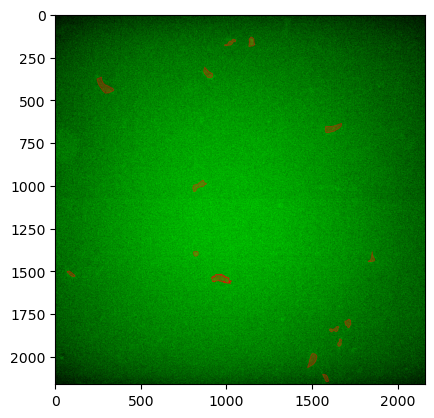

In [30]:
img = io.imread('Moe Effciency_A02_s1_green.tif')
plt.imshow(img)

**Isolate Annotation Channel** (red)

*Extract individual channels:*
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]

red_only_image[:, :, 0] = red_channel  # Red channel active
green_only_image[:, :, 1] = green_channel  # Green channel active

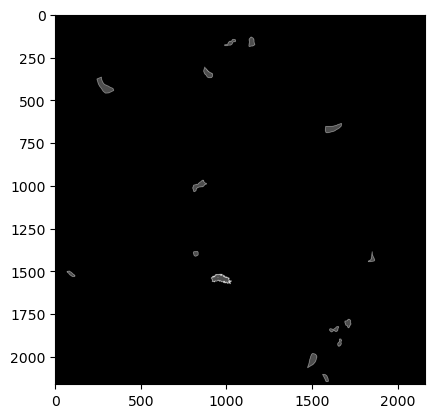

In [31]:
annotations = img[:,:,0]
plt.imshow(annotations, cmap='gray')


Threshold into (T/F) binary image--> we can later use this as logic to decrease the intensity of the unwanted backflash, then overlay the corrected green channel to create a clear composite RGB image

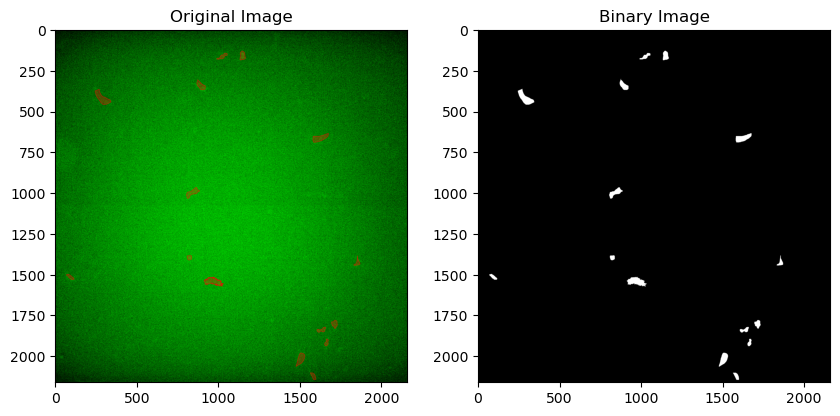

In [32]:
# Apply the thresholding operation
binary_image = annotations > 0

# Display the original and binary images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(binary_image, cmap=plt.cm.gray)
ax[1].set_title('Binary Image')

plt.show()


##  Loop Over all Images
save all annotations as a binary mask

In [ ]:
filenames = os.listdir()
for filename in filenames:
    if 'tif' not in filename:
        filenames.remove(filename)
print(len(filenames))

In [ ]:
for file in filenames:
    img = io.imread(file) # load in image
    annotations = img[:,:,0] # isolate annotation (red) channel
    binary_image = annotations > 0 # turn annotations into a binary mask
    output_name = os.path.join('masks', file + '_mask.tif')
    io.imsave(output_name, img_as_ubyte(binary_image))
    

# 2) Modify Image Intensity using Binary Mask
## Example Image:

In [33]:
from skimage import img_as_float
from skimage.exposure import rescale_intensity

In [34]:
os.chdir('../../green_only')

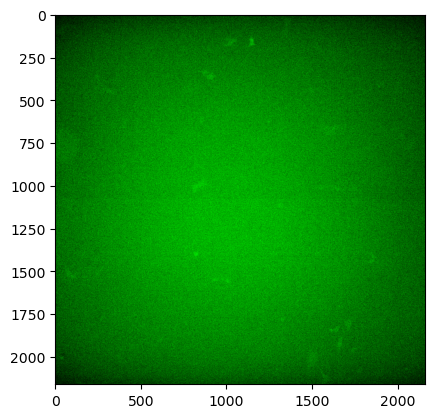

In [35]:
# Convert images to float from uint8--> broader range of values for transformation in brightness
image = img_as_float(io.imread('Moe Effciency_A02_s1_green.tif')) 
plt.imshow(image)

In [36]:

# Mask to protect the brightness (keep original brightness where the mask is True)
protected_areas = np.where(binary_image)

# Dimming factor for the rest of the image
dim_factor = 0.5  # Reduce brightness to 50%

# Create a new image array for output
modified_image = image * dim_factor

# Restore the protected areas to original brightness
modified_image[protected_areas] = image[protected_areas]

# Ensure the output is within the correct intensity range
modified_image = rescale_intensity(modified_image, out_range=(0, 1))

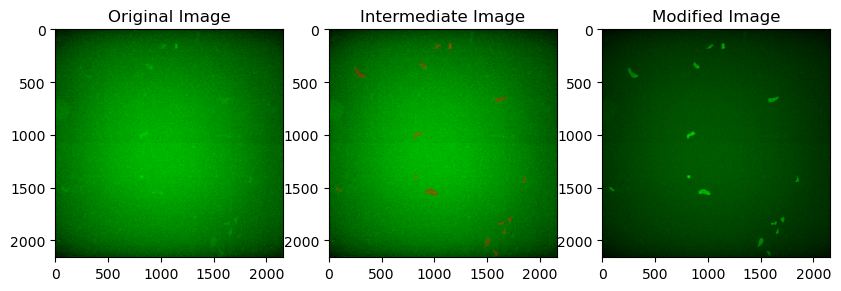

In [37]:

# Display the original and modified images
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(img, cmap=plt.cm.gray)
ax[1].set_title('Intermediate Image')

ax[2].imshow(modified_image, cmap=plt.cm.gray)
ax[2].set_title('Modified Image')

plt.show()

In [39]:
os.chdir('modified')

In [ ]:
filename = 'Moe Effciency_A02_s1_green_modified.tif' # remember to remove the .tif extension!
io.imsave(filename, img_as_ubyte(modified_image))


# 3) Create Updated RGB Composite

In [38]:
img_red = io.imread('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/red_only/Moe Effciency_A02_s1_red.tif')
# plt.imshow(img_red)

In [40]:
img_blue = np.zeros_like(modified_image[:,:,1])
rgb_image = np.stack((img_as_ubyte(img_red[:,:,0]), img_as_ubyte(modified_image[:,:,1]), img_as_ubyte(img_blue)), axis=-1)
# plt.imshow(rgb_image)

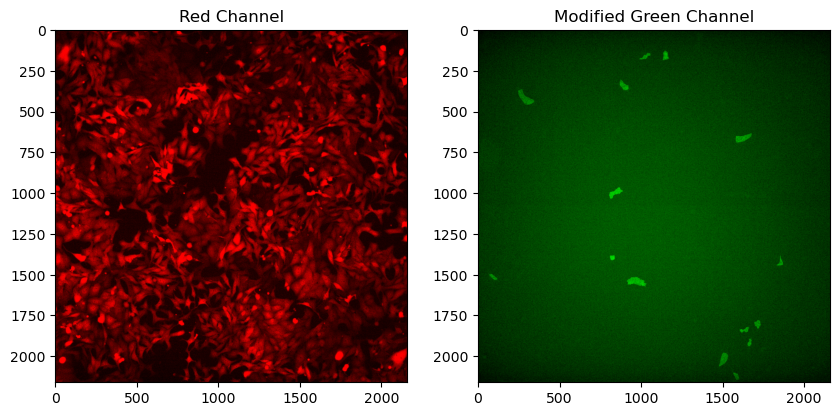

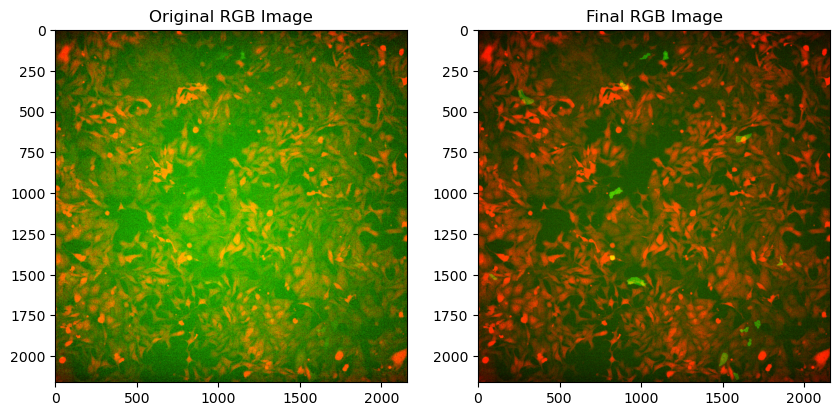

In [41]:
# Display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(img_red, cmap=plt.cm.gray)
ax[0].set_title('Red Channel')

ax[1].imshow(modified_image, cmap=plt.cm.gray)
ax[1].set_title('Modified Green Channel')

plt.show()
print('\n\n\n')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(io.imread('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/rgb/Moe Effciency_A02_s1_rgb.tif'))
ax[0].set_title('Original RGB Image')

ax[1].imshow(rgb_image, cmap=plt.cm.gray)
ax[1].set_title('Final RGB Image')

plt.show()


# Loop Over all Images
## Create the RGB composite & Modified Green Channel

In [104]:
os.chdir('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/color composite_Elizabeth/modified')
filename = 'Moe Effciency_A02_s1_modified.tif'  # remember to remove the .tif extension!
# io.imsave(filename, img_as_ubyte(rgb_image))

In [18]:
filenames_green = sorted(filenames)
filenames_green

NameError: name 'filenames' is not defined

In [19]:
red_dir = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/red_only'
filenames_red = sorted(os.listdir(red_dir))[0:7]
# filenames_red

In [114]:
filenames = filenames_red + filenames_green
filenames

['Moe Effciency_A02_s1_red.tif',
 'Moe Effciency_A02_s2_red.tif',
 'Moe Effciency_A02_s3_red.tif',
 'Moe Effciency_A02_s4_red.tif',
 'Moe Effciency_A03_s1_red.tif',
 'Moe Effciency_A03_s2_red.tif',
 'Moe Effciency_A03_s3_red.tif',
 'Moe Effciency_A02_s1_green.tif',
 'Moe Effciency_A02_s2_green.tif',
 'Moe Effciency_A02_s3_green.tif',
 'Moe Effciency_A02_s4_green.tif',
 'Moe Effciency_A03_s1_green.tif',
 'Moe Effciency_A03_s2_green.tif',
 'Moe Effciency_A03_s3_green.tif',
 'Moe Effciency_A03_s4_green.tif']

In [21]:
green_dir = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/green_only'
masks_dir = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/analysis/green annotations/masks'
green_output = green_dir + '/modified'

filenames_masks = sorted(os.listdir(masks_dir))
filenames_masks

['Moe Effciency_A02_s1_green_mask.tif',
 'Moe Effciency_A02_s2_green_mask.tif',
 'Moe Effciency_A02_s3_green_mask.tif',
 'Moe Effciency_A02_s4_green_mask.tif',
 'Moe Effciency_A03_s1_green_mask.tif',
 'Moe Effciency_A03_s2_green_mask.tif',
 'Moe Effciency_A03_s3_green_mask.tif',
 'Moe Effciency_A03_s4_green_mask.tif']

In [119]:
green_names = filenames_green + filenames_masks
paired_files_green = {}
for name in green_names:
    if 'green_mask' in name:
        base_name = name.split('_green_mask')[0]
        paired_files_green.setdefault(base_name, {})['mask'] = name
    elif 'green' in name:
        base_name = name.split('_green')[0]
        paired_files_green.setdefault(base_name, {})['green'] = name
paired_files_green

{'Moe Effciency_A02_s1': {'green': 'Moe Effciency_A02_s1_green.tif',
  'mask': 'Moe Effciency_A02_s1_green_mask.tif'},
 'Moe Effciency_A02_s2': {'green': 'Moe Effciency_A02_s2_green.tif',
  'mask': 'Moe Effciency_A02_s2_green_mask.tif'},
 'Moe Effciency_A02_s3': {'green': 'Moe Effciency_A02_s3_green.tif',
  'mask': 'Moe Effciency_A02_s3_green_mask.tif'},
 'Moe Effciency_A02_s4': {'green': 'Moe Effciency_A02_s4_green.tif',
  'mask': 'Moe Effciency_A02_s4_green_mask.tif'},
 'Moe Effciency_A03_s1': {'green': 'Moe Effciency_A03_s1_green.tif',
  'mask': 'Moe Effciency_A03_s1_green_mask.tif'},
 'Moe Effciency_A03_s2': {'green': 'Moe Effciency_A03_s2_green.tif',
  'mask': 'Moe Effciency_A03_s2_green_mask.tif'},
 'Moe Effciency_A03_s3': {'green': 'Moe Effciency_A03_s3_green.tif',
  'mask': 'Moe Effciency_A03_s3_green_mask.tif'},
 'Moe Effciency_A03_s4': {'green': 'Moe Effciency_A03_s4_green.tif',
  'mask': 'Moe Effciency_A03_s4_green_mask.tif'}}

In [22]:
def load_image(filename, input_directory):
    return img_as_float(io.imread(os.path.join(input_directory, filename), as_gray=True))

def save_colored_channel_image(image, channel_index, filename, directory):
    # Create a full black image with the same shape as the original RGB
    colored_image = np.zeros((image.shape[0], image.shape[1], 3))
    # Insert the processed channel into the correct slot
    colored_image[:, :, channel_index] = image
    # Convert to 8-bit and save
    io.imsave(os.path.join(directory, filename), img_as_ubyte(colored_image))


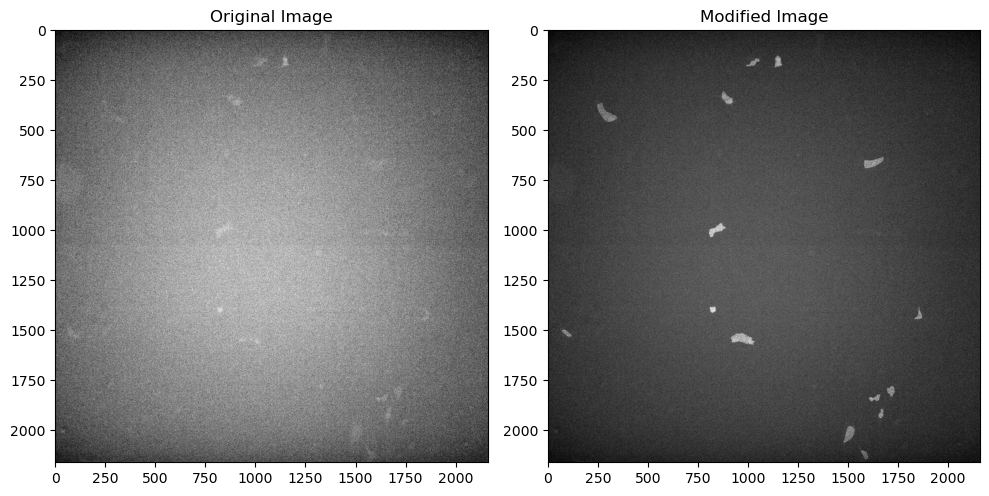

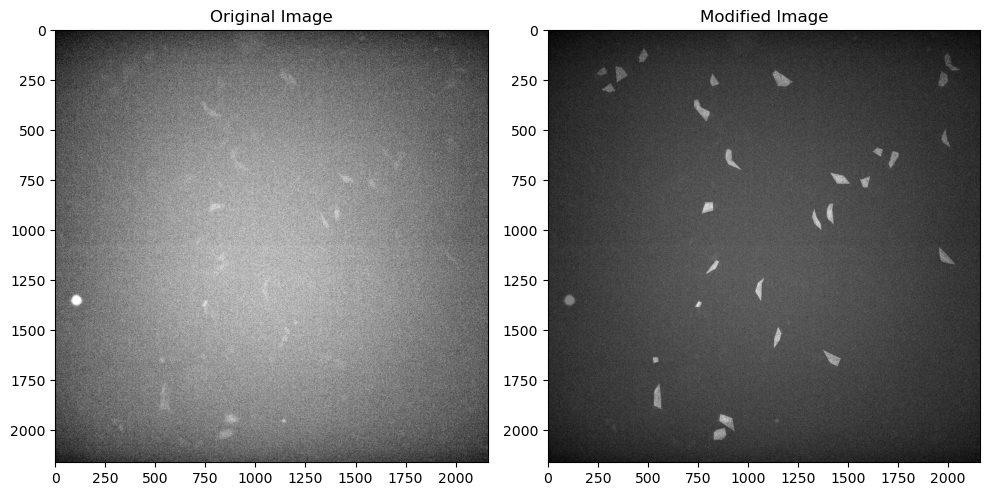

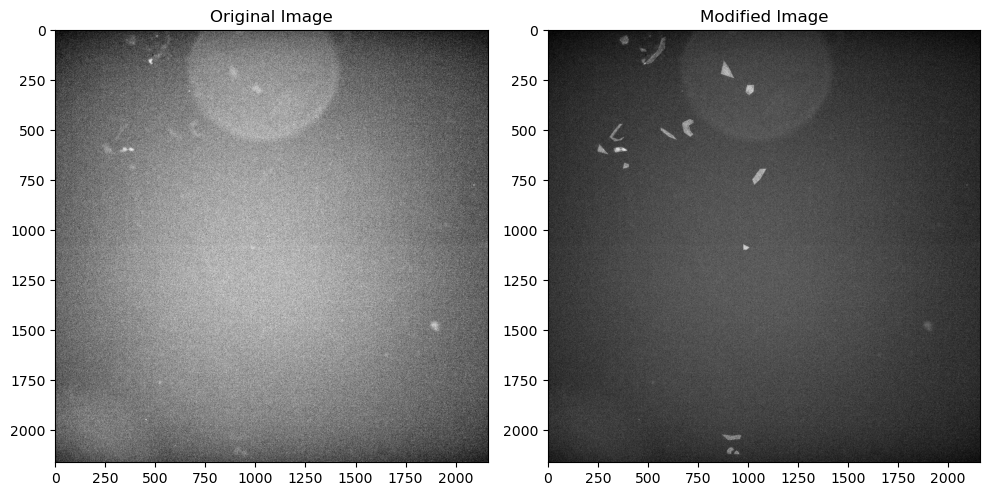

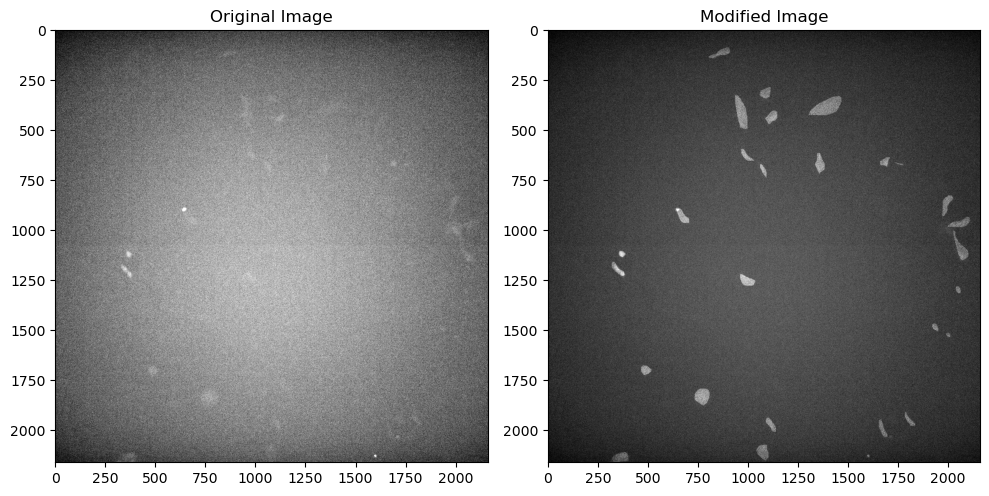

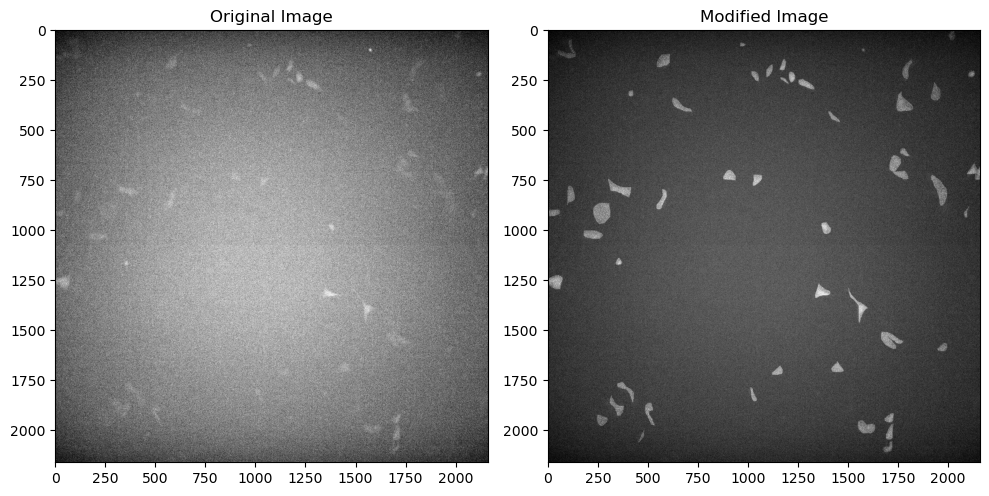

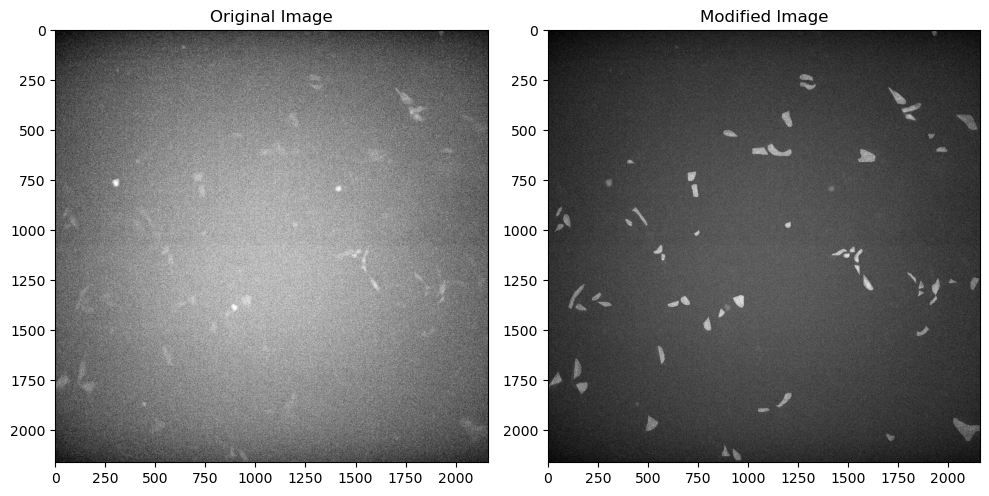

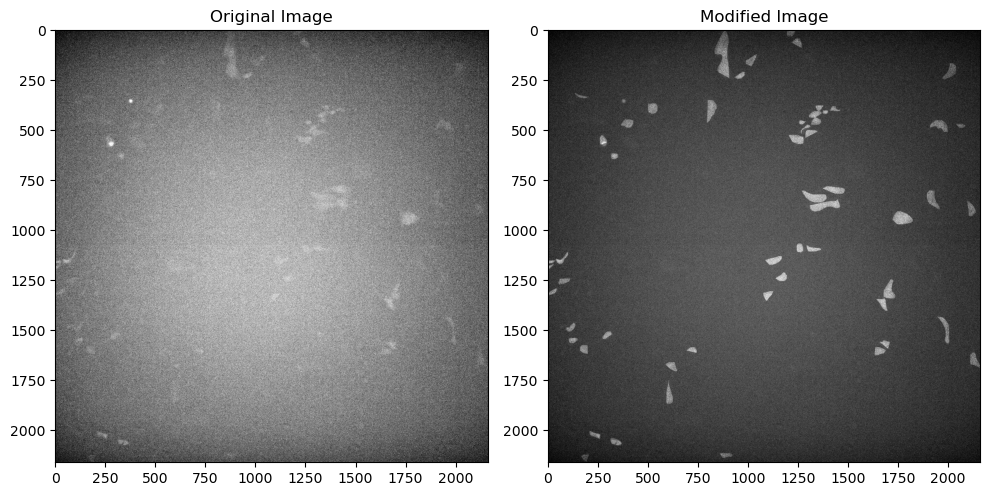

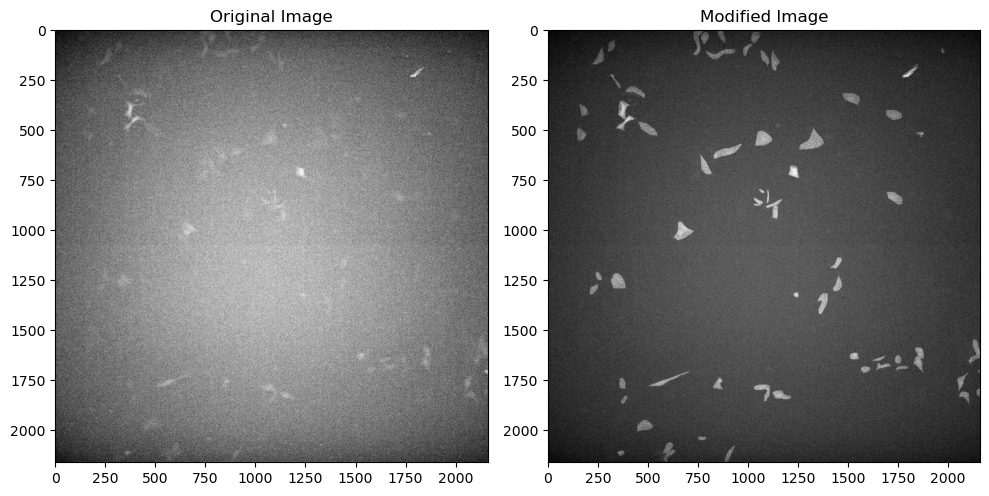

In [127]:

for base_name, files in paired_files_green.items():
    mask = load_image(files['mask'], masks_dir)
    img_green = load_image(files['green'], green_dir)

    # Mask to protect the brightness (keep original brightness where the mask is True)
    protected_areas = np.where(mask)
    
    # Dimming factor for the rest of the image
    dim_factor = 0.5  # Reduce brightness to 50%
    
    # Create a new image array for output
    modified_image = img_green * dim_factor
    
    # Restore the protected areas to original brightness
    modified_image[protected_areas] = img_green[protected_areas]
    
    # Ensure the output is within the correct intensity range
    modified_image = rescale_intensity(modified_image, out_range=(0, 1))

    # # Save processed images as colored images
    # save_colored_channel_image(modified_image, 1, f"{base_name}_green_modified.tif", green_output)
    
    # Display the original and modified images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes.ravel()
    
    ax[0].imshow(img_green, cmap=plt.cm.gray)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(modified_image, cmap=plt.cm.gray)
    ax[1].set_title('Modified Image')

    # Adjust the layout so that titles and images are neatly arranged
    fig.tight_layout()
    
    # Save the figure
    fig.savefig(green_output + '/montages/' + f"{base_name}_green_montage.png")  # Specify the path and file name here



## RGB Composite

create paired dict of modified green image & corresponding red image to stack

In [147]:
filenames = os.listdir(green_output) + os.listdir(red_dir)
filenames

['Moe Effciency_A02_s4_green_modified.tif',
 'Moe Effciency_A03_s3_green_modified.tif',
 '.DS_Store',
 'montages',
 'Moe Effciency_A02_s1_green_modified.tif',
 'Moe Effciency_A02_s2_green_modified.tif',
 'Moe Effciency_A03_s4_green_modified.tif',
 'Moe Effciency_A02_s3_green_modified.tif',
 'Moe Effciency_A03_s1_green_modified.tif',
 'Moe Effciency_A03_s2_green_modified.tif',
 'Moe Effciency_B03_s4_red.tif',
 'Moe Effciency_B02_s2_red.tif',
 'Moe Effciency_A03_s1_red.tif',
 'Moe Effciency_B02_s3_red.tif',
 'Moe Effciency_B01_s4_red.tif',
 'Moe Effciency_A03_s3_red.tif',
 'Moe Effciency_B02_s1_red.tif',
 'Moe Effciency_A03_s2_red.tif',
 'Moe Effciency_A02_s4_red.tif',
 'Moe Effciency_A02_s1_red.tif',
 'Moe Effciency_B03_s3_red.tif',
 'Moe Effciency_B02_s4_red.tif',
 'Moe Effciency_B03_s2_red.tif',
 'Moe Effciency_B01_s1_red.tif',
 'Moe Effciency_A02_s2_red.tif',
 'Moe Effciency_A03_s4_red.tif',
 'Moe Effciency_B01_s3_red.tif',
 'Moe Effciency_B01_s2_red.tif',
 'Moe Effciency_A02_s3_red.

In [ ]:
paired_files = {}
for filename in filenames:
    if 'red' in filename and 'B' not in filename:
        base_name = filename.split('_red')[0]
        paired_files.setdefault(base_name, {})['red'] = filename
    elif 'green' in filename:
        base_name = filename.split('_green')[0]
        paired_files.setdefault(base_name, {})['green'] = filename
        

{'Moe Effciency_A02_s4': {'green': 'Moe Effciency_A02_s4_green_modified.tif',
  'red': 'Moe Effciency_A02_s4_red.tif'},
 'Moe Effciency_A03_s3': {'green': 'Moe Effciency_A03_s3_green_modified.tif',
  'red': 'Moe Effciency_A03_s3_red.tif'},
 'Moe Effciency_A02_s1': {'green': 'Moe Effciency_A02_s1_green_modified.tif',
  'red': 'Moe Effciency_A02_s1_red.tif'},
 'Moe Effciency_A02_s2': {'green': 'Moe Effciency_A02_s2_green_modified.tif',
  'red': 'Moe Effciency_A02_s2_red.tif'},
 'Moe Effciency_A03_s4': {'green': 'Moe Effciency_A03_s4_green_modified.tif',
  'red': 'Moe Effciency_A03_s4_red.tif'},
 'Moe Effciency_A02_s3': {'green': 'Moe Effciency_A02_s3_green_modified.tif',
  'red': 'Moe Effciency_A02_s3_red.tif'},
 'Moe Effciency_A03_s1': {'green': 'Moe Effciency_A03_s1_green_modified.tif',
  'red': 'Moe Effciency_A03_s1_red.tif'},
 'Moe Effciency_A03_s2': {'green': 'Moe Effciency_A03_s2_green_modified.tif',
  'red': 'Moe Effciency_A03_s2_red.tif'}}

In [ ]:
rgb_image = np.stack((img_as_ubyte(img_red[:,:,0]), img_as_ubyte(modified_image[:,:,1]), img_as_ubyte(img_blue)), axis=-1)


In [ ]:
rgb_out_dir = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/color composite_Elizabeth/modified'

for base_name, files in paired_files.items():
    img_red = io.imread(os.path.join(red_dir, files['red']))
    img_green = io.imread(os.path.join(green_output, files['green']))

    # # Save processed images as colored images
    # save_colored_channel_image(modified_image, 1, f"{base_name}_green_modified.tif", green_output)

    img_blue = np.zeros_like(img_red[:,:,1])
    rgb_image = np.stack((img_as_ubyte(img_red[:,:,0]), img_as_ubyte(img_green[:,:,1]), img_as_ubyte(img_blue)), axis=-1)

    io.imsave(os.path.join(rgb_out_dir, f"{base_name}_rgb_modified.tif"), img_as_ubyte(rgb_image))


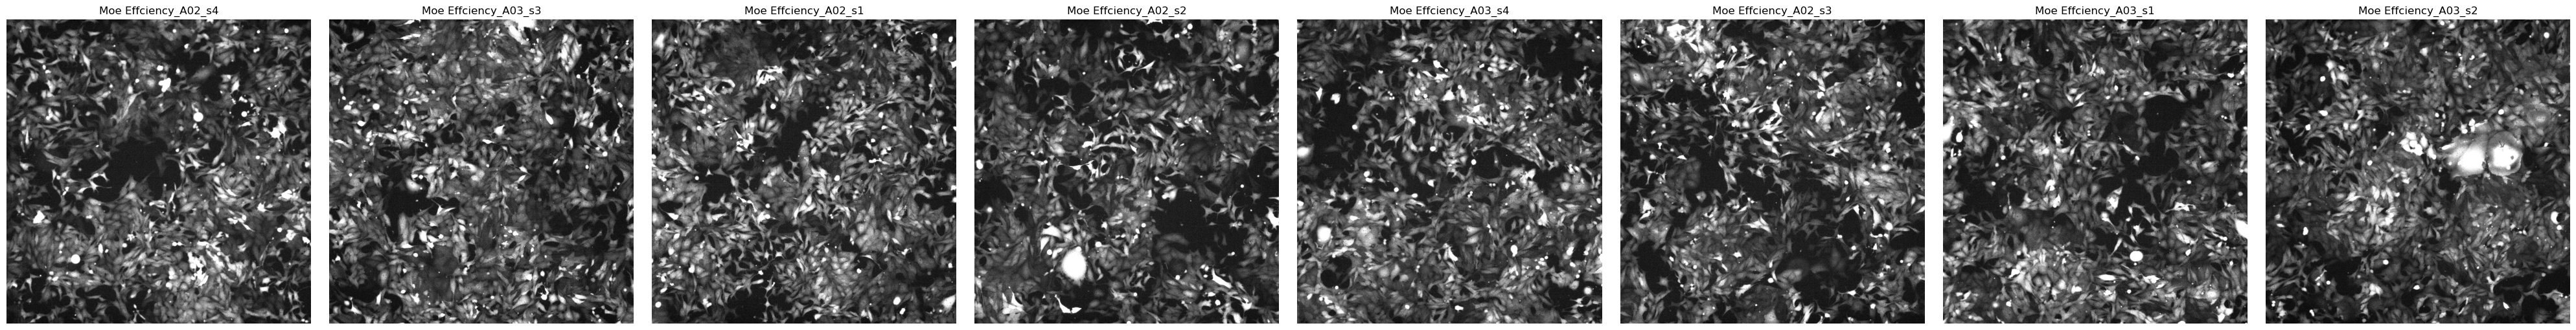

In [165]:
# Calculate the number of images you want to display
num_images = len(paired_files)

# Create a new figure with appropriate size and number of subplots
# This creates a 1-row by num_images-column grid of subplots
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))

# If there's only one image, axes won't be an array, so we need to make it one
if num_images == 1:
    axes = [axes]

# Loop through the base names and files
for ax, (base_name, files) in zip(axes, paired_files.items()):
    img_red = load_image(files['red'], red_dir)  # Make sure load_image returns the image correctly
    ax.imshow(img_red, cmap='gray')
    ax.set_title(base_name)  # Setting the title to the base name of the image
    ax.axis('off')  # Turn off axis

# Adjust the layout to prevent overlapping
plt.tight_layout()


# Create Green Cell outline overlays

In [24]:
filenames_red = os.listdir(red_dir)
filenames = filenames_masks + filenames_red
paired_files = {}
for filename in filenames:
    if 'red' in filename and 'B' not in filename:
        base_name = filename.split('_red')[0]
        paired_files.setdefault(base_name, {})['red'] = filename
    elif 'green' in filename:
        base_name = filename.split('_green')[0]
        paired_files.setdefault(base_name, {})['mask'] = filename

paired_files

{'Moe Effciency_A02_s1': {'mask': 'Moe Effciency_A02_s1_green_mask.tif',
  'red': 'Moe Effciency_A02_s1_red.tif'},
 'Moe Effciency_A02_s2': {'mask': 'Moe Effciency_A02_s2_green_mask.tif',
  'red': 'Moe Effciency_A02_s2_red.tif'},
 'Moe Effciency_A02_s3': {'mask': 'Moe Effciency_A02_s3_green_mask.tif',
  'red': 'Moe Effciency_A02_s3_red.tif'},
 'Moe Effciency_A02_s4': {'mask': 'Moe Effciency_A02_s4_green_mask.tif',
  'red': 'Moe Effciency_A02_s4_red.tif'},
 'Moe Effciency_A03_s1': {'mask': 'Moe Effciency_A03_s1_green_mask.tif',
  'red': 'Moe Effciency_A03_s1_red.tif'},
 'Moe Effciency_A03_s2': {'mask': 'Moe Effciency_A03_s2_green_mask.tif',
  'red': 'Moe Effciency_A03_s2_red.tif'},
 'Moe Effciency_A03_s3': {'mask': 'Moe Effciency_A03_s3_green_mask.tif',
  'red': 'Moe Effciency_A03_s3_red.tif'},
 'Moe Effciency_A03_s4': {'mask': 'Moe Effciency_A03_s4_green_mask.tif',
  'red': 'Moe Effciency_A03_s4_red.tif'}}

In [26]:
from skimage import measure

# Define utility functions
def load_image(file_path):
    return io.imread(file_path)

def plot_overlay(red_img, mask_img, output_dir, base_name):
    # Find contours on the binary mask
    contours = measure.find_contours(mask_img, level=0.5)

    # Plot the red image with contours overlaid
    plt.figure(figsize=(10, 10))
    plt.imshow(red_img, cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], color='lime', linewidth=2)  # Use a visible color like lime

    plt.axis('off')
    plt.title(f'Overlay of {base_name}')
    plt.savefig(os.path.join(output_dir, f'{base_name}_overlay.png'))  # Save the figure
    plt.close()  # Close the plot to free up memory

# Directory to save the overlays
overlay_output_dir = '/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/analysis'
os.makedirs(overlay_output_dir, exist_ok=True)

# Process each pair
for base_name, files in paired_files.items():
    red_image_path = os.path.join(red_dir, files['red'])
    mask_image_path = os.path.join(masks_dir, files['mask'])

    red_image = load_image(red_image_path)
    mask_image = load_image(mask_image_path)

    # Call the overlay function
    plot_overlay(red_image, mask_image, overlay_output_dir, base_name)

print("Processing complete. Overlays are saved.")


Processing complete. Overlays are saved.


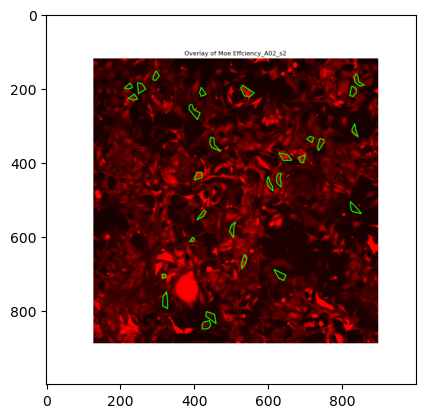

In [43]:
plt.imshow(io.imread('/Users/elizabeth 1/Library/CloudStorage/Box-Box/Wu Lab/Project - 2024/Functional screening/240411 test in 6-well/Moe Effciency_Plate_1252/Elizabeth/analysis/Moe Effciency_A02_s2_overlay.png'))